# Rapport de MLL - TME1

## Maximilien Nowak et Youcef Benslimane

Le but principal de ce TME est d’implémenter un classificateur binaire qui se base sur les arbres de décision.

### L’essentiel sur les arbres de décision

In [1]:
import numpy as np
import  pickle
import matplotlib.pyplot as plt

In [2]:
def entropie(vect):
    n = vect.size
    unique, count = np.unique(vect, return_counts=True)
    p = count/n
    ent = -np.sum(p*np.log(p))
    return ent

def entropie_cond(list_vect):
    res = 0
    total_length = 0
    for v in list_vect:
        length = v.size
        res += length * entropie(v)
        total_length += length
    
    entC = res/total_length
    return entC

In [21]:
# data : tableau (films ,features), id2titles : dictionnaire  id -> titre ,
# fields : id  feature  -> nom
[data , id2titles , fields ]= pickle.load(open("imdb_extrait.pkl","rb"))
# la  derniere  colonne  est le vote
datax=data [: ,:32]
datay=np.array ([1 if x[33] >6.5  else  -1 for x in data])



In [4]:
ent_datay = entropie(datay)
ent_datay

0.6840731540145955

In [5]:
fields_num = 28
ent_cond = np.zeros(fields_num) 
for field in range(fields_num):
    ent_cond[field] = entropie_cond([datay[datax[:, field] == 1], 
                                    datay[datax[:, field] != 1]])
ent_cond

array([0.67994028, 0.68360929, 0.6840712 , 0.68252302, 0.68406157,
       0.67298199, 0.67776557, 0.66834313, 0.68159391, 0.68407315,
       0.68407315, 0.68407315, 0.67613533, 0.68266372, 0.68398548,
       0.6837022 , 0.68407315, 0.64202544, 0.67267917, 0.68320271,
       0.68236801, 0.67462006, 0.68276896, 0.68388467, 0.68249102,
       0.68407315, 0.68407204, 0.66945832])

In [6]:
print(f"L'entropie max est {np.max(ent_datay-ent_cond)}")
print(f"Sois l'argument binaire numéro {np.argmax(ent_datay-ent_cond)}")
print(f"cette argument correspond à : {fields[np.argmax(ent_datay-ent_cond)]}")

L'entropie max est 0.04204771856211831
Sois l'argument binaire numéro 17
cette argument correspond à : Drama


Nous venons donc ici de montrer quel est le premier argument servant de split pour l'arbre binaire de classification.
Nous pourrons montrer dans les questions suivantes la validiter de notre réponse

### Question 3

Après avoir fait le calcul demandé, on constate que pour les données fournies “Drama” est un attribut à partir duquel on doit commencer car cela nous donne un gain d’information le plus haut égal à 0.0420477. On remarque qu’une valeur 0 de l’entropie correspond au cas où il n’y a pas des aspects aléatoires tandis qu’une valeur 1 correspond bien au désordre le plus grand.

### Quelques expériences préliminaires

In [7]:
from sklearn.tree import  export_graphviz 
from sklearn.tree  import  DecisionTreeClassifier  as  DTree
import graphviz
import itertools

dt = DTree()
dt.max_depth = 5
#on fixe la  taille  max de l’arbre a 5
dt.min_samples_split = 2
#nombre  minimum d’exemples  pour  spliter  un noeud
dt.fit(datax ,datay)
dt.predict(datax [:5 ,:])
print(dt.score(datax ,datay))
# dessine l’arbre  dans un  fichier  pdf   si pydot  est  installe.
#dt.to_pdf("/tmp/test_tree.pdf",fields)

export_graphviz(dt, out_file='decisionTree.dot', feature_names = dict(itertools.islice(fields.items(), 32)))

#graph = pydot.graph_from_dot_data(dt.to_dot(fields))[0]
#Image(graph.create_png())

0.736647045999564


Voici a quoi resemble l'arbre de decision si créé si dessus :
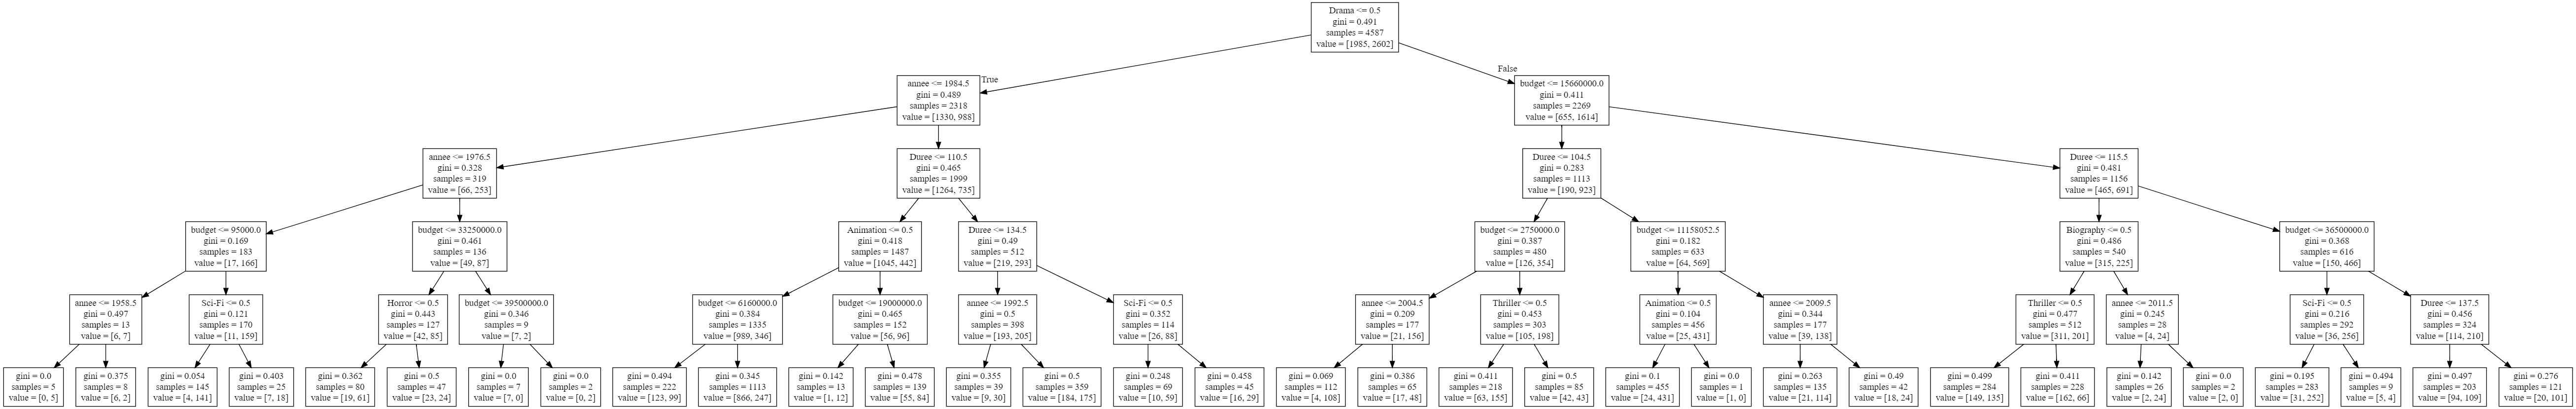

Regardons maintenant la root node 
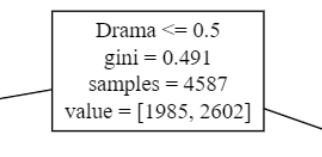

Comme on peux le voir nous trouvons bien *drama* comme premier split ce qui valide le resultat trouver avec notre fonction d'entropie dans le paragraphe precedent.

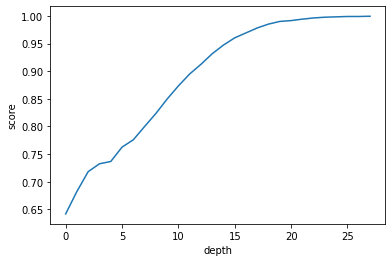

In [22]:
def treeClassifTesting(datax, datay, maxDepth=29,graphical=False):
    scores = []
    for i in range(1,maxDepth):
        dt = DTree()
        dt.max_depth = i # on fixe la taille max de l ’ arbre a i
        dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
        
        #train data
        dt.fit(datax,datay)
        #test data
        dt.predict(datax[:200 ,:])
        
        #different method to display the results
        if(not graphical):
            print("le score de bonne classification pour la profondeur " + str(i) + " est : " + str(dt.score(datax,datay)))
        else:
            scores.append(dt.score(datax,datay))
        
        if i%2 == 0:
            export_graphviz(dt, out_file='decisionTreeDepth' +str(i)+'.dot', feature_names = dict(itertools.islice(fields.items(), 32)))

    if(graphical):
        #we plot the curve of the data
        plt.plot(scores)
        plt.ylabel("score")
        plt.xlabel("depth")
        plt.show()
        
treeClassifTesting(datax,datay,graphical=True)

### Question 4

(Vous allez trouver les arbres générés dans le dossier du TME)

Sur la base de données imdb, l’on a construit certains arbres avecdes profondeurs différentes [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]. On constate que plus est la profondeur plus d’exemples l’on sépare. Généralement, ce comportement est normal car à chaque fois on raffine la prédiction quand on va plus loin dans l'arbre.

### Question 5

On constate qu’un score de bonne classification plus élevé correspond à une profondeur de plus grande valeur. Un tel résultat est plutôt attendu parce que vu que les données test et train sont identiques dans ce cas, alors plus on augmente la profondeur plus les données collent mieux plus on peut mieux séparer les exemplaires.

### Question 6

Non, le score ne peut pas être un indicateur fiable du comportement parce que cela nous dit tout simplement que l’algorithme marche bien pour les données fournies en entrée. Par contre, il n’y a aucune garantie que cela marcherait pour les autres données pas encore observées.
Une approche assez classique pour résoudre ce problème-là c’est de séparer la base de données initiale en deux : Base d'entrainement et base de test.

### Sur et sous apprentissage

In [9]:
def createPartition(data, partition):
    np.random.shuffle(data)
    datax = data[:,:32]
    datay = np.array([1 if x[33] > 6.5 else -1 for x in data])
    
    sep_index = int(partition * data.shape[0]) #separation index
    
    datax_train = datax[:sep_index]
    datax_test = datax[sep_index:]
    datay_train = datay[:sep_index]
    datay_test = datay[sep_index:]
    
    return datax_train, datax_test, datay_train, datay_test

In [10]:
#test
print(data.shape)
print(datax.shape)
print(datay.shape)
datax_train, datax_test, datay_train, datay_test = createPartition(data,0.2)
print(datax_train.shape)
print(datay_train.shape)
print(datax_test.shape)
print(datay_test.shape)

(4587, 34)
(4587, 32)
(4587,)
(917, 32)
(917,)
(3670, 32)
(3670,)


In [11]:
partitions = [0.2, 0.5, 0.8]
scores_train = np.zeros((20,3))
scores_test = np.zeros((20,3))
for j, p in enumerate(partitions):
    datax_train, datax_test, datay_train, datay_test = createPartition(data,p)
    for i in range(1, 21):
        dt = DTree() 
        dt.max_depth = i
        dt.min_samples_split = 2
        dt.fit(datax_train, datay_train)  
        index = i-1
        scores_train[index,j] = dt.score(datax_train, datay_train)
        scores_test[index,j] = dt.score(datax_test, datay_test) 

### Question 7

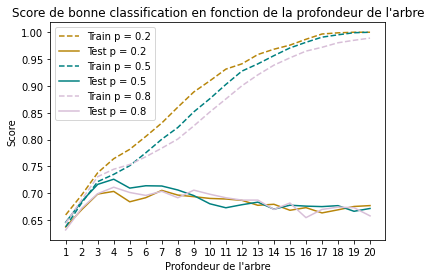

In [12]:
depths = np.arange(1,21)
_, ax = plt.subplots()
ax.plot(depths, scores_train[:,0], label = 'Train p = 0.2', color = 'darkgoldenrod', linestyle = 'dashed')
ax.plot(depths, scores_test[:,0], label = 'Test p = 0.2', color = 'darkgoldenrod')
ax.plot(depths, scores_train[:,1], label = 'Train p = 0.5', color = 'teal', linestyle = 'dashed')
ax.plot(depths, scores_test[:,1], label = 'Test p = 0.5', color = 'teal')
ax.plot(depths, scores_train[:,2], label = 'Train p = 0.8', color = 'thistle', linestyle = 'dashed')
ax.plot(depths, scores_test[:,2], label = 'Test p = 0.8', color = 'thistle')
ax.set_title('Score de bonne classification en fonction de la profondeur de l\'arbre')
ax.set_xticks(depths)
ax.set_xlabel('Profondeur de l\'arbre')
ax.set_ylabel('Score')
ax.legend()
plt.show();

### Question 8

On constate que quand il y a peu d’exemples d’apprentissage l’erreur d’apprentissage devient la plus petite, en revanche, cela produit l’erreur de test la plus élevée (sur apprentissage).
Pour ce cas-là, tel comportement n’est pas trop inattendue parce que, intuitivement, moins est une taille de données en entrée, plus facile il est pour le modèle de s’adapter pour ces données.
D’autre part, tel modèle n’est ajusté que pour le nombre d’exemples assez petit ne peut pas être capable à marcher proprement pour les données pas utilisées pendant l’apprentissage. 
On observe un résultat assez pareil si les partitions ont des quantités égales des exemplaires. Pour le cas inverse où la majorité d’exemples sont ceux d’apprentissage, on observe des résultats bien différents. En effet, l’erreur d’apprentissage est la plus élevée par rapport à ces trois partitionnements, par contre, cela nous donne la meilleure erreur de test.

### Question 9

 Avec cette méthode de séparation des données, il a été nécessaire de faire un compromis entre qualité du modèle et fiabilité de la prédiction. En effet, quelque soit le partitionnement, ce modèle fait une multitude de classifications fausses, même si cela peut suffire parfois pour des cas qui nécessitent pas l'exactitude complète.
 A priori, une amélioration peut se faire en effectuant plutôt une validation croisée qui permettrait d'avoir des résultats plus stables et plus fiables.

### Validation croisée : sélection de modèle

In [13]:
def partition(data, n):
    data_size = data.shape[0]
    size = data_size//n
    remainder = data_size%n
    parts_size = [size+1 if i<remainder else size for i in range(n)]
    parts_index = [sum(parts_size[:i]) for i in range(len(parts_size) + 1)]
    return parts_index

testarr = np.arange(10)
np.random.shuffle(testarr)
x = partition(testarr, 3)
x

[0, 4, 7, 10]

In [14]:
def createPartitionVC(data, part, i):
    datax = data[:,:32]
    datay = np.array([1 if x[33] > 6.5 else -1 for x in data])
    
    datax_train = np.concatenate([datax[:part[i]], datax[part[i+1]:]], axis=0)
    datay_train = np.concatenate([datay[:part[i]], datay[part[i+1]:]], axis=0)
    datax_test = datax[part[i]:part[i+1]]
    datay_test = datay[part[i]:part[i+1]]
    
    return datax_train, datax_test, datay_train, datay_test

In [15]:
scores_trainVC = np.zeros((20,5))
scores_testVC = np.zeros((20,5))

partitions = [5,10,15,20,40]
for j, p in enumerate(partitions):
    part = partition(data, p)
    for i in range(p):
        datax_train, datax_test, datay_train, datay_test = createPartitionVC(data,part,i)
        for k in range(1, 21):
            dt = DTree() 
            dt.max_depth = k
            dt.min_samples_split = 2
            dt.fit(datax_train, datay_train)  
            index = k-1
            scores_trainVC[index,j] = dt.score(datax_train, datay_train)
            scores_testVC[index,j] = dt.score(datax_test, datay_test) 
        

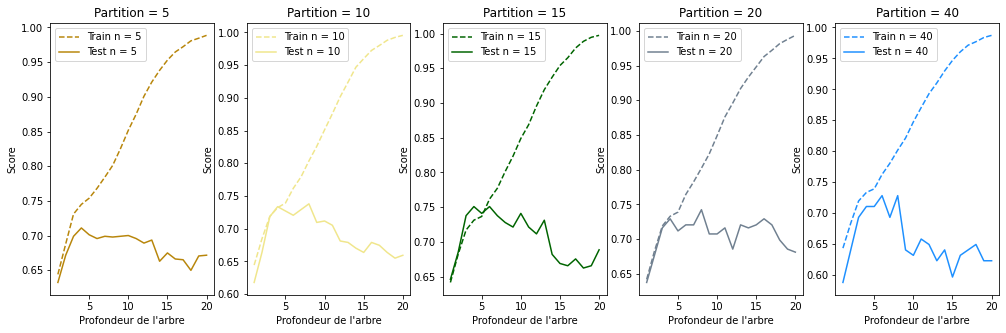

In [16]:
colors = ['darkgoldenrod','khaki','darkgreen','slategray', 'dodgerblue']
_, ax = plt.subplots(ncols=5,nrows=1,figsize=(17, 5))
for i in range(len(partitions)):
    ax[i].plot(depths, scores_trainVC[:,i], label = 'Train n = ' + str(partitions[i]), color = colors[i], linestyle = 'dashed')
    ax[i].plot(depths, scores_testVC[:,i], label = 'Test n = ' + str(partitions[i]), color = colors[i])
    ax[i].set_title('Partition = ' + str(partitions[i]))
    ax[i].set_xlabel('Profondeur de l\'arbre')
    ax[i].set_ylabel('Score')
    ax[i].legend()
plt.show()  
  


Deplus sklearn possède lui aussi une fonction de cross validation que nous pouvons tester avec la fonction suivante :

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

def treeClassifCrossVal(datax, datay, trainSize=0.6,nbSplit=5, maxDepth=29):
    scoresTr = []
    scoresTe = []
    for i in range(1,maxDepth):
        dt = DTree()
        dt.max_depth = i # on fixe la taille max de l ’ arbre a i
        dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud

        cv = ShuffleSplit(n_splits=nbSplit,train_size=trainSize)

        scores = cross_validate(dt, datax, datay,cv=cv, scoring='f1', return_train_score=True)
        
        #perform a score on both the training data and the test data
        scoresTr.append(scores['train_score'].mean())
        scoresTe.append(scores['test_score'].mean())
    
    return scoresTr,scoresTe

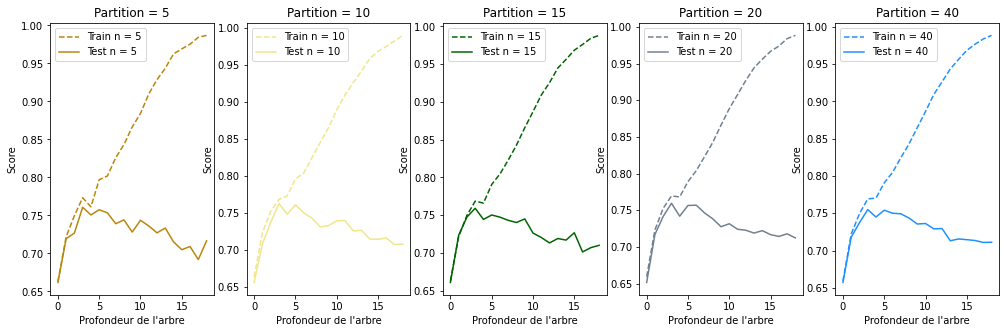

In [25]:
datax = data[:,:32]
datay = np.array([1 if x[33] > 6.5 else -1 for x in data])

partitions = [5,10,15,20,40]
colors = ['darkgoldenrod','khaki','darkgreen','slategray', 'dodgerblue']
_, ax = plt.subplots(ncols=5,nrows=1,figsize=(17, 5))
for i in range(len(partitions)):
    Tr,Te = treeClassifCrossVal(datax, datay,nbSplit=partitions[i],maxDepth=20);
    ax[i].plot(Tr, label = 'Train n = ' + str(partitions[i]), color = colors[i], linestyle = 'dashed')
    ax[i].plot(Te, label = 'Test n = ' + str(partitions[i]), color = colors[i])
    ax[i].set_title('Partition = ' + str(partitions[i]))
    ax[i].set_xlabel('Profondeur de l\'arbre')
    ax[i].set_ylabel('Score')
    ax[i].legend()
plt.show()

### Question 10 

Comme on peux le voir les garphes pour le fait main et la fait avec sklearn se resemble beaucoup malgrès des ecarts dans les scores. Néans moins on peux voir que tout les deux converges dans le meme sens.

enfin on remarque qu'il n'y as pas beaucoup de difference avec le split des donnée de test et de train. une raison possible pour cela et que les donnés IMBD sois ne sois par ranger et de se fait on se retrouve alors avec des donnée "aléatoire" dans les deux cas (split des donnée et crossvalidation)